<a href="https://colab.research.google.com/github/bala1802/ERA/blob/main/Session-10/Session_10_Working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/ERA-Session-10

/content/drive/MyDrive/ERA-Session-10


In [10]:
# !git clone https://github.com/bala1802/modular.git

In [1]:
!pip install -r /content/drive/MyDrive/ERA-Session-10/modular/requirements.txt -q

In [2]:
cd /content/drive/MyDrive/ERA-Session-10/modular

/content/drive/MyDrive/ERA-Session-10/modular


In [2]:
cd /content/drive/MyDrive/ERA-Session-10

/content/drive/MyDrive/ERA-Session-10


In [3]:
# !git pull

In [4]:
from modular.model import CustomResNet01
from modular.transforms import CustomResnetTransforms
from modular.dataloader import Cifar10SearchDataset
import modular.utils as utils

from torchsummary import summary
import yaml
from yaml.loader import SafeLoader

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# Load Parameters

In [5]:
with open("modular/params.yaml") as f:
    params = yaml.load(f, Loader=SafeLoader)

# Data Loading

In [6]:
means = params["transform_means"]
stds = params["transform_stds"]

train_transforms = CustomResnetTransforms.train_transforms(means=means, stds=stds)
test_transforms = CustomResnetTransforms.test_transforms(means, stds)

In [7]:
train = Cifar10SearchDataset(root='./data', train=True,
                                        download=True, transform=train_transforms)
test = Cifar10SearchDataset(root='./data', train=False,
                                       download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
len(train), len(test)

(50000, 10000)

In [9]:
train_loader = utils.construct_train_loader(train)
test_loader = utils.construct_test_loader(test)

len(train_loader), len(test_loader)

(98, 20)

# Model Creation

In [10]:
model = CustomResNet01().to(utils.get_device())
summary(model, input_size= (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 34, 34]           8,192
       BatchNorm2d-5          [-1, 128, 34, 34]             256
              ReLU-6          [-1, 128, 34, 34]               0
         MaxPool2d-7          [-1, 128, 17, 17]               0
            Conv2d-8          [-1, 128, 17, 17]         147,456
       BatchNorm2d-9          [-1, 128, 17, 17]             256
             ReLU-10          [-1, 128, 17, 17]               0
           Conv2d-11          [-1, 128, 17, 17]         147,456
      BatchNorm2d-12          [-1, 128, 17, 17]             256
             ReLU-13          [-1, 128, 17, 17]               0
           Conv2d-14          [-1, 256,

# Load Model Training Configuration

In [11]:
optimizer = utils.construct_optimizer(model=model, learning_rate=0.03, weight_decay=1e-4)
cross_entropy_loss = utils.construct_cross_entropy_loss()

In [12]:
lr_finder = utils.construct_LR_finder(model=model, optimizer=optimizer, criterion=cross_entropy_loss, device="cuda",
                          dataloader=train_loader, end_learning_rate=10,
                          number_of_iterations=200, step_mode="exp")

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 4.79E-02


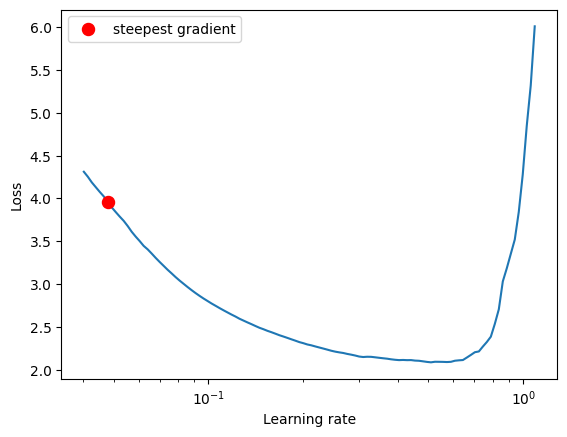

(<Axes: xlabel='Learning rate', ylabel='Loss'>, 0.04785923770503283)

In [13]:
lr_finder.plot()